# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from os import listdir
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Day by Day Visualization

## Input Data from 26th February to today

In [3]:
files = [f for f in listdir('./data/')]

df_dict = {}

for file in files:
    url = './data/' + file
    df_dict[file[:-4]] = pd.read_csv(url)

### Visualize the data from 26th February to today

In [4]:
#get top 10 countries having the most population
country_list = list(df_dict.values())[0].sort_values(by=['Population'], ascending=False).iloc[:10]['Country,Other'].to_list()
country_list

['China',
 'India',
 'USA',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico']

In [10]:
date_list = []
new_death = []
new_cases = []
new_recovered = []
for key, item in df_dict.items():
    date_list.append(key)
    temp = item.set_index('Country,Other')
    new_death.append(temp['NewDeaths'][country_list].to_list())
    new_cases.append(temp['NewCases'][country_list].to_list())
    new_recovered.append(temp['NewRecovered'][country_list].to_list())

new_death_df = pd.DataFrame(new_death, columns=country_list, index=date_list)
new_cases_df = pd.DataFrame(new_cases, columns=country_list, index=date_list)
new_recovered_df = pd.DataFrame(new_recovered, columns=country_list, index=date_list)

new_death_df.index = pd.to_datetime(new_death_df.index, format='%d-%m-%Y')
new_cases_df.index = pd.to_datetime(new_cases_df.index, format='%d-%m-%Y')
new_recovered_df.index = pd.to_datetime(new_recovered_df.index, format='%d-%m-%Y')

new_death_df = new_death_df.sort_index()
new_cases_df = new_cases_df.sort_index()
new_recovered_df = new_recovered_df.sort_index()

            China  India  USA  Indonesia  Pakistan  Nigeria  Brazil  \
2023-02-26      0      1   19          3         0        0      14   
2023-02-27      0      1   50          3         0        0      59   
2023-02-28      0      0    0          0         0        0       0   
2023-03-02      0      0  130          4         0        0      33   
2023-03-03      0      3   93          5         0        0      46   
2023-03-04      0      0    0          3         0        0       0   

            Bangladesh  Russia  Mexico  
2023-02-26           0      31       0  
2023-02-27           0      30      48  
2023-02-28           0      35       0  
2023-03-02           0      39      50  
2023-03-03           0      40       0  
2023-03-04           0      39       0  


<AxesSubplot:title={'center':'New Recovered'}>

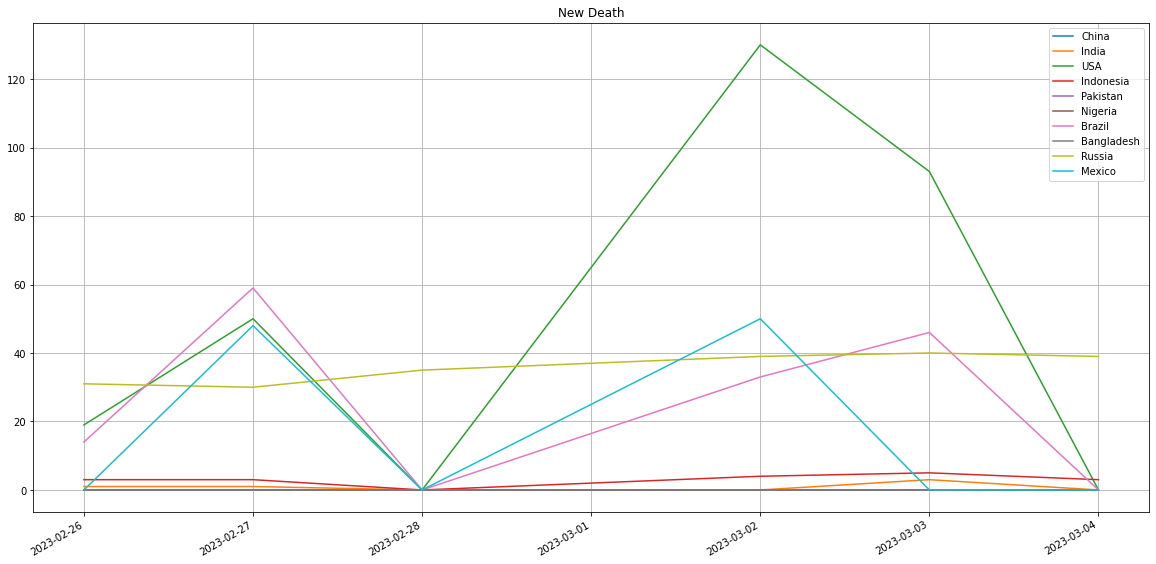

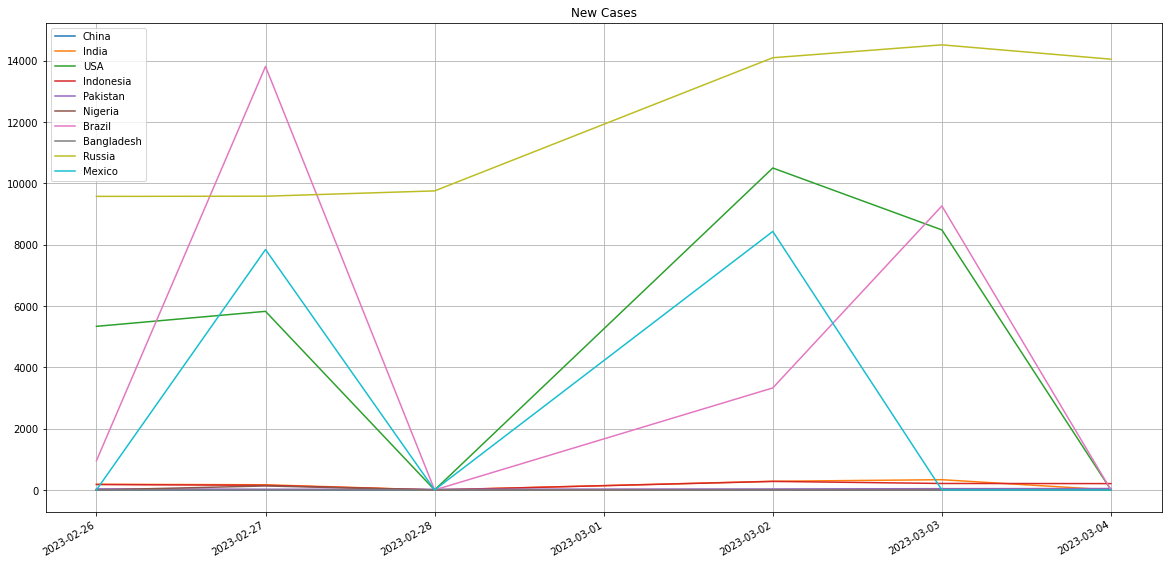

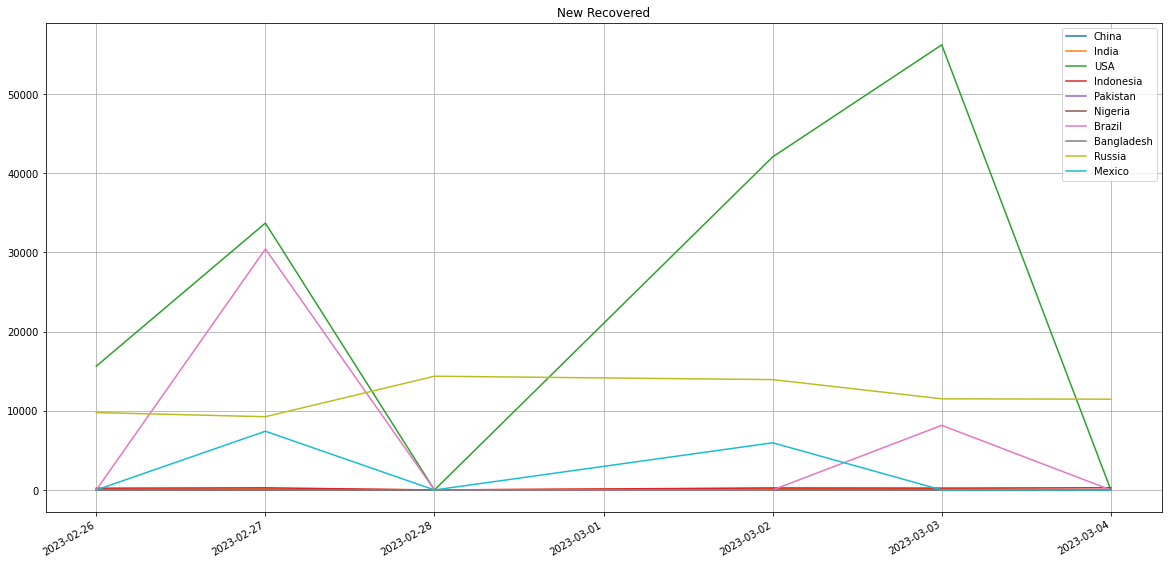

In [11]:
new_death_df.plot(figsize=(20,10), title='New Death', grid=True)
new_cases_df.plot(figsize=(20,10), title='New Cases', grid=True)
new_recovered_df.plot(figsize=(20,10), title='New Recovered', grid=True)

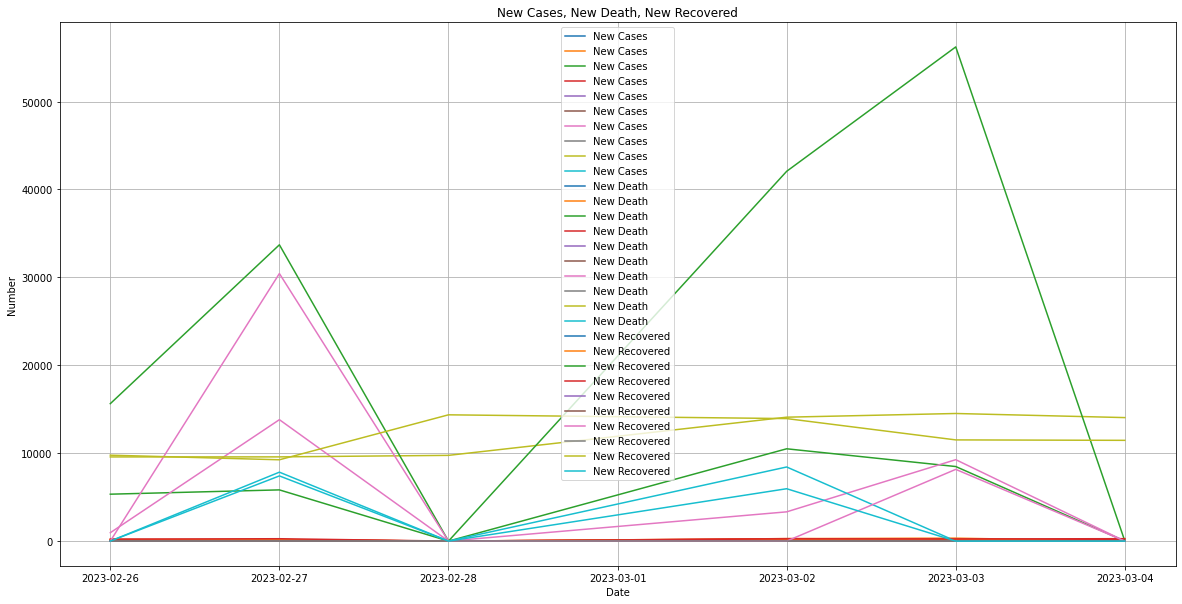

In [14]:
#compare the new cases and new death and new recovered in the same plot

